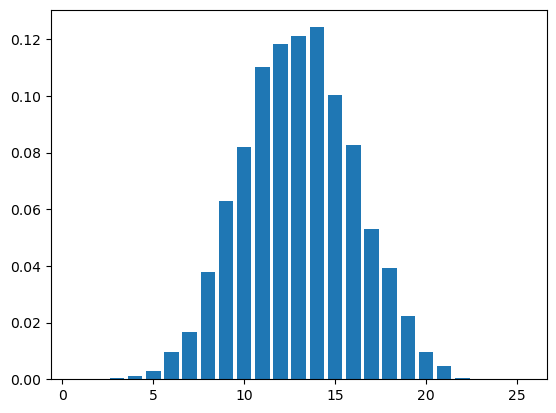

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Read the data from the txt file
def read_data(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Rename the columns
    data.columns = ['ColNum', 'Value']
    
    return data

def normalize_data(data):
    data['Value'] = data['Value'] / data['Value'].sum()
    return data

def plot_data(data):
    plt.bar(data['ColNum'], data['Value'], alpha = 1)
    plt.show()
    
path = './simulacion-1/histogram-9.csv'
datos = read_data(path)
datos = normalize_data(datos)
plot_data(datos)

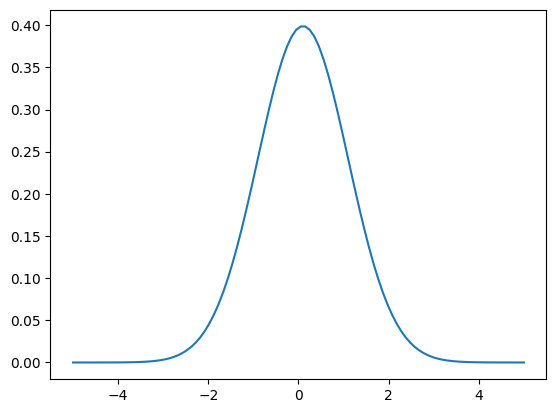

In [2]:
def gaussiana(x, mu, sigma):
    coef = 1 / (sigma * np.sqrt(2 * np.pi))
    exponente = -0.5 * ((x - mu) / sigma) ** 2
    return coef * np.exp(exponente)

x = np.linspace(-5, 5, 100)
plt.plot(x, gaussiana(x, 0.1, 1))

In [3]:
histograma1 = datos['gausianna']
histograma2 = datos['radioLog0_1']
histograma3 = datos['radioLog1_0']

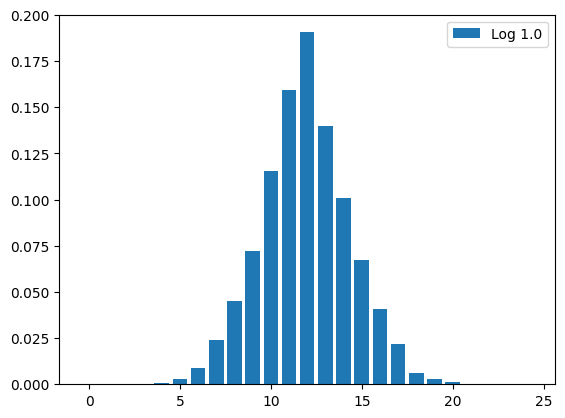

In [6]:
#plot the histogram
plt.bar(range(len(histograma3)), histograma3, alpha = 1, label = 'Log 1.0')
# plt.plot(range(len(histograma2)), histograma2, 'ro-', alpha = 1, label = 'Log 0.1')
# plt.plot(range(len(histograma1)), histograma1, 'bo-', alpha = 1, label = 'Gaussiano')
plt.legend()

In [17]:
x_data = range(len(histograma1))
y_data = histograma1


popt, pcov = curve_fit(gaussiana, x_data, y_data, p0=[1, 1])

# popt contiene los parámetros ajustados: [mu, sigma, A]
mu_ajustado, sigma_ajustado = popt

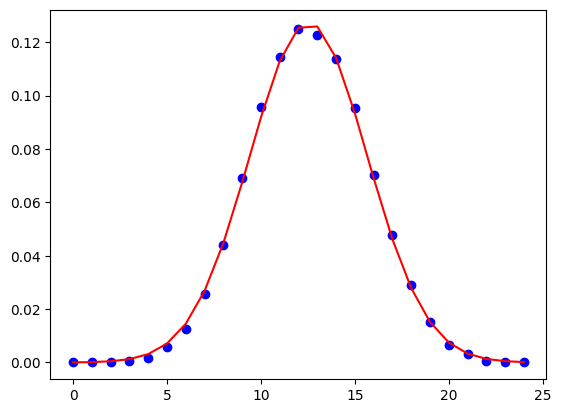

In [18]:
plt.scatter(x_data, y_data, label='Datos experimentales', color='blue')
plt.plot(x_data, gaussiana(x_data, *popt), label='Ajuste Gaussiano', color='red')

In [19]:
import numpy as np
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función de distribución binomial
def binomial_pmf(k, n, p):
    """
    Función de probabilidad de masa (PMF) para la distribución binomial.
    
    Parámetros:
    k : int o array-like
        Número de éxitos.
    n : int
        Número de ensayos.
    p : float
        Probabilidad de éxito en cada ensayo.

    Retorna:
    float o array-like
        Probabilidad de obtener k éxitos en n ensayos.
    """
    coef_binomial = math.comb(n, k)
    return coef_binomial * (p**k) * (1 - p)**(n - k)


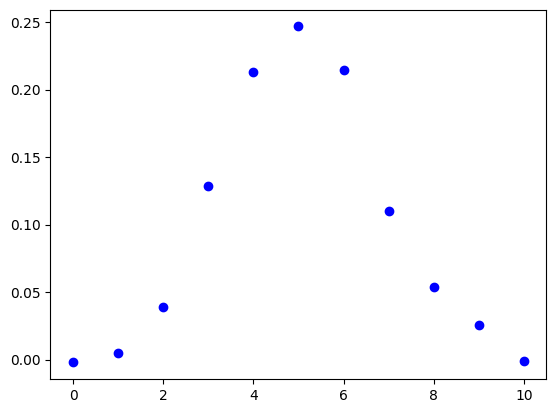

In [20]:
# Datos experimentales (en un escenario real, reemplazar con los tuyos)
x_data = np.arange(0, 11)  # Número de éxitos (k) posibles en una distribución binomial con n=10
n_real = 10  # Número de ensayos real
p_real = 0.5  # Probabilidad de éxito real
y_data = [binomial_pmf(k, n_real, p_real) for k in x_data]  # Generar los datos usando la distribución binomial real

# Agregar algo de ruido a los datos experimentales
y_data_noise = y_data + 0.01 * np.random.normal(size=len(y_data))

# Graficar los datos con ruido
plt.scatter(x_data, y_data_noise, label='Datos experimentales con ruido', color='blue')
plt.show()


In [21]:
# Definir la función que será ajustada por curve_fit
def binomial_fit(k, n, p):
    return binomial_pmf(k, int(n), p)

# Ajustar la curva binomial a los datos experimentales
# La estimación inicial de los parámetros puede ser [n=10, p=0.5]
popt, pcov = curve_fit(binomial_fit, x_data, y_data_noise, p0=[10, 0.5])

# popt contiene los parámetros ajustados: [n, p]
n_ajustado, p_ajustado = popt

# Graficar los datos y la curva ajustada
plt.scatter(x_data, y_data_noise, label='Datos experimentales', color='blue')
plt.plot(x_data, [binomial_fit(k, *popt) for k in x_data], label='Ajuste Binomial', color='red')
plt.title('Ajuste de curva con distribución binomial')
plt.xlabel('Número de éxitos (k)')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

# Mostrar los parámetros ajustados
print(f"Número de ensayos ajustado (n): {n_ajustado}")
print(f"Probabilidad de éxito ajustada (p): {p_ajustado}")


TypeError: only integer scalar arrays can be converted to a scalar index